# California Housing Price Prediction
Dataset by :
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.
https://www.kaggle.com/datasets/camnugent/california-housing-prices

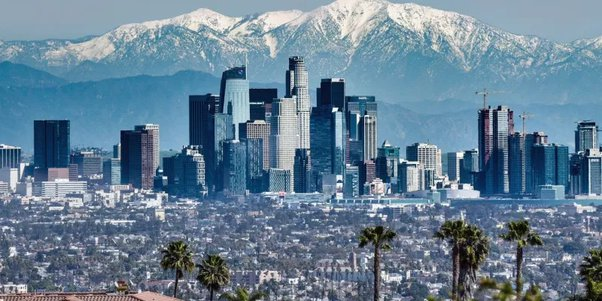

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.iloc[:,:-1].describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


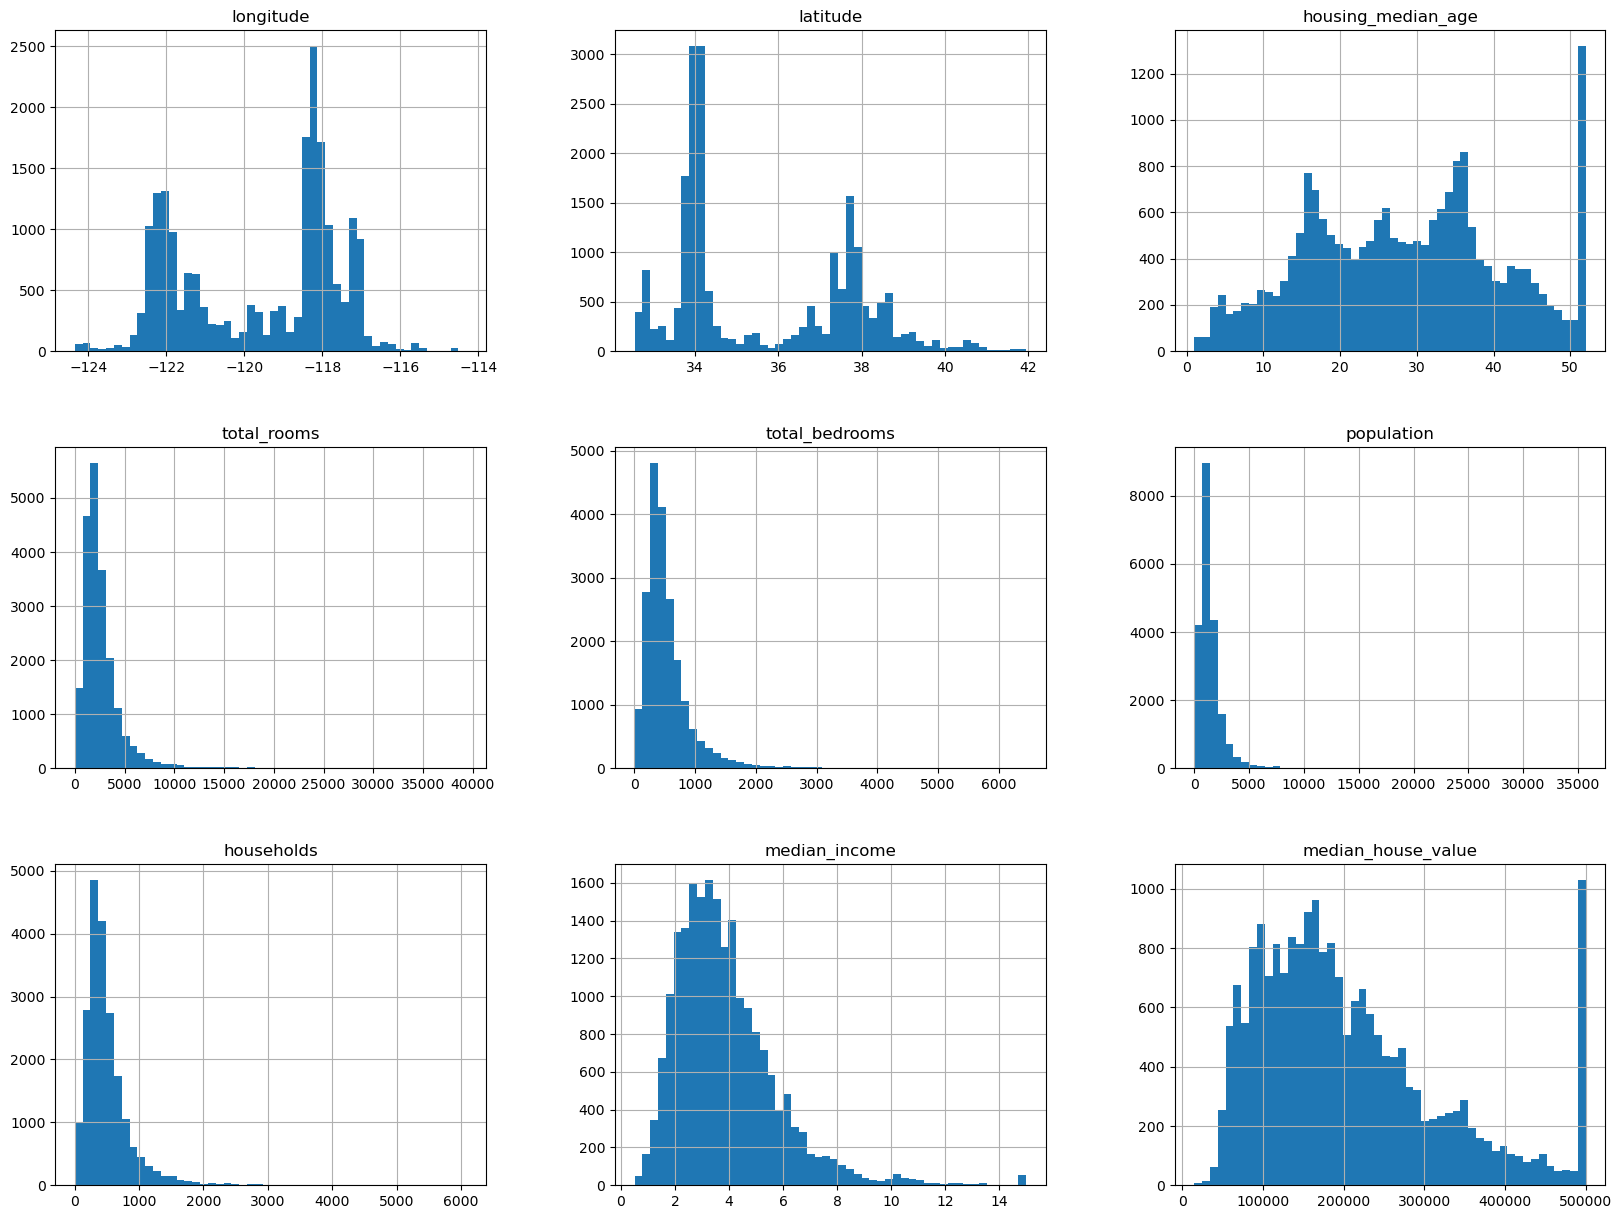

In [12]:
import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize = (20,15))
plt.show()

## Observations on the data:
* Median Income is caled
* Median Age age Median House value is capped
        
        * Median House Value fattens out at 500K. So we may need to remove the labels because houses would not be predicted correctly beyond 500K
* All attributes have different scales. We need feature scaling
* Histograms are tail-heavy and are skewed. We need to fix outliers

In [17]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [31]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


Since we have an intuition that Median Income is an important field we need to categorize it

In [32]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [36]:
strat_train_set, strat_test_set = train_test_split(housing, test_size = 0.2, random_state = 42, stratify = housing['income_cat'])

In [37]:
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis = 1, inplace = True)

#### Test and Train sets have been stratified to have uniform distribution on Median Income

## Visualizing the data

In [39]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

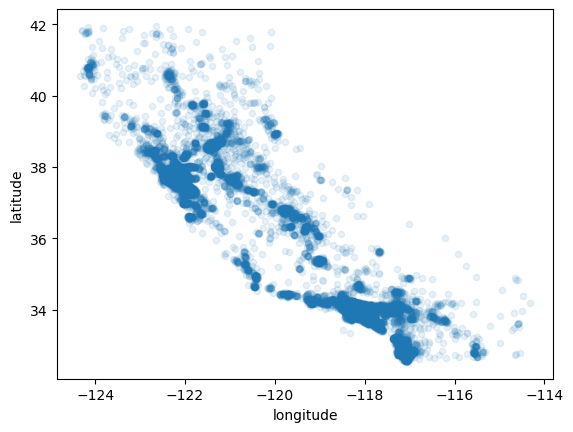

In [42]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha =0.1)

Looks like Cali ! Alpha = 0.1 highights plots with high density (Alpha = Line opacity)

So most data points are in -
* (-122, 38), (-120, 36-39), (-118 - -116, 10-35) 

Now to compare the high density populated areas with price

#### The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices):15

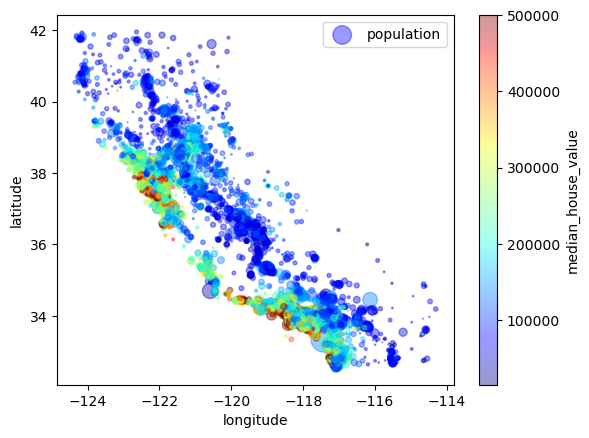

In [45]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha =0.4, s = housing['population']/100, label = 'population',
             c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True,
            )
plt.legend()
plt.show()

##### Pearson's Correlation

In [48]:
corr_matrix = housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']].corr()

In [52]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

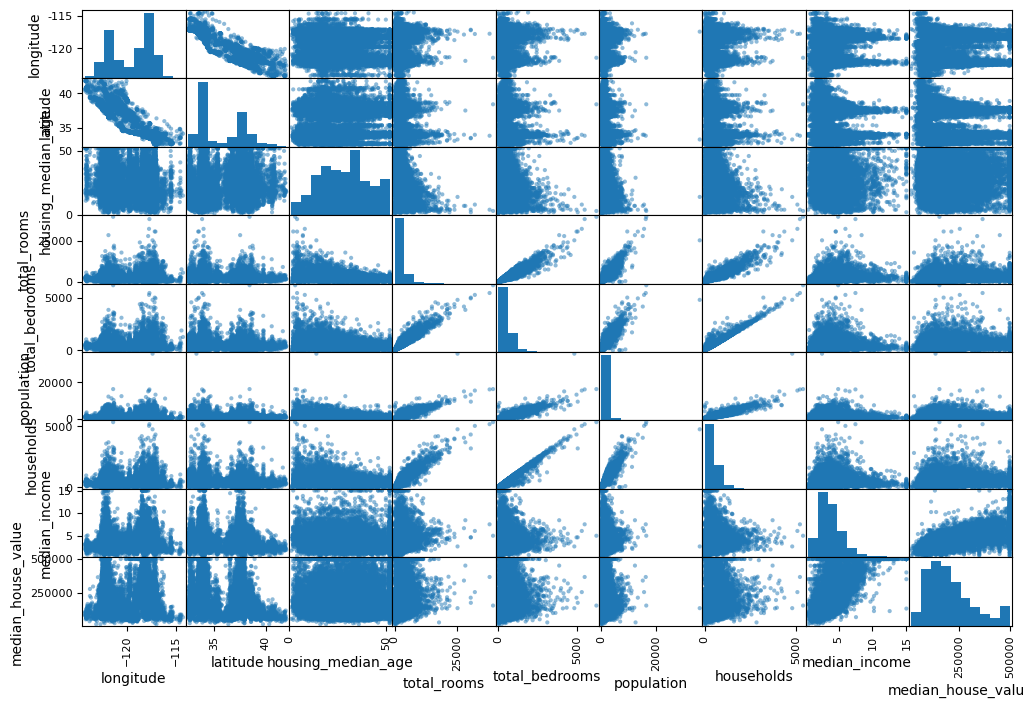

In [60]:
from pandas.plotting import scatter_matrix

attributes = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

scatter_matrix(housing[attributes], figsize = (12,8))
plt.show()


<Axes: xlabel='median_income', ylabel='median_house_value'>

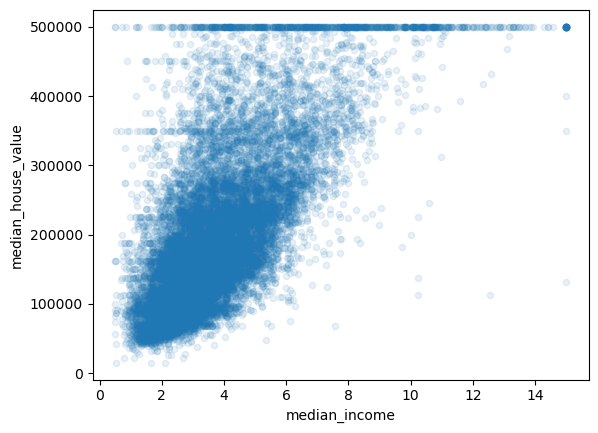

In [61]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

Above shows the 500K capping

## Experimenting with Attribute Combinations

In [62]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [72]:
corr_matrix = housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_house',
       'bedrooms_ratio', 'people_per_house']].corr()

In [73]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

In [75]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_label = strat_train_set['median_house_value'].copy()

### Data Cleaning

*For NaN Entries*

* Option 1: get rid of records
* Option 2 : Get rid of features
* Option 3: Fill with median or mode

In [76]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [80]:
housing_option1 = housing[housing['total_bedrooms'].notna()].copy()
housing_label_option1 = housing_label[housing['total_bedrooms'].notna()].copy()

In [81]:
housing_option2 = housing.drop('total_bedrooms', axis = 1, inplace = False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [86]:
housing_option3 = housing.copy()
median = housing_option3['total_bedrooms'].median()
housing_option3['total_bedrooms'].fillna(median, inplace = True)

null_rows_idx = housing.isnull().any(axis=1)
housing_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [90]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

housing_num = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

OHE

In [99]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [101]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [102]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [104]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [105]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [107]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [108]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6    #index loc of the columns in housing

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self  #nothing to do
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix]/X[:,household_ix]
        population_per_household = X[:, population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    

In [110]:
attr_addr = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs  = attr_addr.transform(housing.values)

In [113]:
housing_extra_attribs.shape

(16512, 11)

### Feature Scaling

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),
                        ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [125]:
!pip install sklearn_features

In [136]:
from sklearn.pipeline import FeatureUnion
from sklearn_features.transformers import DataFrameSelector


num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('Ohe', OneHotEncoder(sparse_output = False)),
])

full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [138]:
housing_prepared = full_pipeline.fit_transform(housing)

In [139]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [140]:
housing_prepared.shape

(16512, 16)

In [143]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

LinearRegression()

In [160]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print('lin_rmse_train: {}'.format(lin_rmse))

lin_rmse_train: 68627.87390018745


In [161]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor()

In [162]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print('tree_rmse_train: {:.2f}'.format(tree_rmse))

tree_rmse_train: 0.00


In [163]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_label, scoring = 'neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-scores)

In [164]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [165]:
display_scores(rmse_scores)

Scores: [72950.45750398 68562.29078433 69321.23428824 71338.40346467
 70565.29841616 77571.96773169 71055.70729017 73204.3059855
 69174.58805184 71072.83077533]
Mean: 71481.70842919
Standard deviation: 2488.740211893062


In [167]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)

RandomForestRegressor()

In [168]:
scores = cross_val_score(forest_reg, housing_prepared, housing_label, scoring = 'neg_mean_squared_error', cv = 10)
rmse_score = np.sqrt(-scores)
display_scores(rmse_score)

Scores: [51521.80811182 48975.09528852 46425.14453052 51996.80365965
 47764.62736033 51936.97635922 52285.83862148 49305.39710049
 48703.07115818 53885.66286243]
Mean: 50280.042505264755
Standard deviation: 2249.124451406701


In [171]:
import joblib

joblib.dump(forest_reg, 'forest_reg.pkl')
my_model_loaded = joblib.load('forest_reg.pkl')

In [174]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,4,6,8]}
   
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_label)

print('Best Param: ', grid_search.best_params_)
print('Best Estimator: ', grid_search.best_estimator_)

Best Param:  {'max_features': 6, 'n_estimators': 30}
Best Estimator:  RandomForestRegressor(max_features=6, n_estimators=30)


In [175]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64059.85058531055 {'max_features': 2, 'n_estimators': 3}
55829.173669754004 {'max_features': 2, 'n_estimators': 10}
52780.80261625232 {'max_features': 2, 'n_estimators': 30}
59992.30924601618 {'max_features': 4, 'n_estimators': 3}
52643.4862317896 {'max_features': 4, 'n_estimators': 10}
50669.39423378902 {'max_features': 4, 'n_estimators': 30}
59525.90431675659 {'max_features': 6, 'n_estimators': 3}
52026.068281452644 {'max_features': 6, 'n_estimators': 10}
49894.24092231457 {'max_features': 6, 'n_estimators': 30}
58513.65922316606 {'max_features': 8, 'n_estimators': 3}
52225.71724990581 {'max_features': 8, 'n_estimators': 10}
50108.901649219486 {'max_features': 8, 'n_estimators': 30}
62000.891893558764 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53883.40350518642 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59370.86305801454 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51748.414059767274 {'bootstrap': False, 'max_features': 4, 'n_estimators'

In [179]:
feature_importance = grid_search.best_estimator_.feature_importances_

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attrib = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attrib

sorted(zip(feature_importance, attributes), reverse = True)


[(0.3282133430769487, 'median_income'),
 (0.1517534674119356, 'INLAND'),
 (0.10720612304846812, 'pop_per_hhold'),
 (0.07560923016224218, 'longitude'),
 (0.0754339530329586, 'bedrooms_per_room'),
 (0.0647930456280361, 'latitude'),
 (0.061937634360061646, 'rooms_per_hhold'),
 (0.041303069338877424, 'housing_median_age'),
 (0.017462628698075907, 'total_rooms'),
 (0.017391850192519275, 'population'),
 (0.016883354264191037, 'total_bedrooms'),
 (0.015587632279283411, 'households'),
 (0.015377715452026503, '<1H OCEAN'),
 (0.006082286920325696, 'NEAR OCEAN'),
 (0.004901771504913766, 'NEAR BAY'),
 (6.289462913599291e-05, 'ISLAND')]

In [180]:
final_model = grid_search.best_estimator_

In [184]:
X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [185]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [186]:
print('Final RMSE:', final_rmse)

Final RMSE: 47668.37943449088


In [188]:
from sklearn.metrics import r2_score

print('Final R2-Score:', r2_score(y_test, final_predictions))

Final R2-Score: 0.82565424536942
